In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from plot_sklearn_dendrogram import plot_sklearn_dendrogram # local python file to view dendrogram

# Read dataset GNI_Surface

### Import dataset

### Drop rows with missing values

In [5]:
dfgni = pd.read_csv("GNI_Surface_Data.txt",sep="\t",header=0)
dfgni.tail()

,Time,Time Code,Country Name,Country Code,Surface,Population,GNI
212,2010,YR2010,"Venezuela, RB",VEN,912050.0,29028033,3.883414e+11
213,2010,YR2010,Virgin Islands (U.S.),VIR,350.0,108358,NaN
214,2010,YR2010,Bermuda,BMU,50.0,65124,7.163899e+09
215,2010,YR2010,Canada,CAN,9984670.0,34005274,1.581500e+12
216,2010,YR2010,United States,USA,9831510.0,309338421,1.512113e+13


In [6]:
dfgni = dfgni.dropna()
dfgni.head()

,Time,Time Code,Country Name,Country Code,Surface,Population,GNI
0,2010,YR2010,Afghanistan,AFG,652860.0,28803167,1.599880e+10
1,2010,YR2010,Bangladesh,BGD,148460.0,152149102,1.246171e+11
2,2010,YR2010,Bhutan,BTN,38394.0,727641,1.497492e+09
3,2010,YR2010,India,IND,3287260.0,1230980691,1.638663e+12
4,2010,YR2010,Maldives,MDV,300.0,364511,2.276923e+09


In [7]:
len(dfgni)

193

# Read dataset 

### Import dataset

In [8]:
dfautres = pd.read_csv("autres_Data.txt",sep="\t",header=0)
dfautres.tail()

,Time,Time Code,Country Name,Country Code,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
212,2010,YR2010,"Venezuela, RB",VEN,5.680916,19.0,73.625000,10.227491
213,2010,YR2010,Virgin Islands (U.S.),VIR,NaN,NaN,77.965854,0.000000
214,2010,YR2010,Bermuda,BMU,NaN,NaN,79.288537,0.000000
215,2010,YR2010,Canada,CAN,17.842219,NaN,81.197561,2.798067
216,2010,YR2010,United States,USA,18.531309,NaN,78.541463,0.981585


### Drop rows with missing values

In [9]:
dfautres = dfautres.dropna()
dfautres.head()

,Time,Time Code,Country Name,Country Code,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
0,2010,YR2010,Afghanistan,AFG,2.255471,158.0,61.226,0.732845
1,2010,YR2010,Bangladesh,BGD,4.071213,119.0,70.198,1.309144
3,2010,YR2010,India,IND,3.169405,115.0,66.625,4.671042
4,2010,YR2010,Maldives,MDV,13.603584,79.0,76.112,0.008966
5,2010,YR2010,Nepal,NPL,4.802811,74.0,67.914,1.470750


In [10]:
len(dfautres)

112

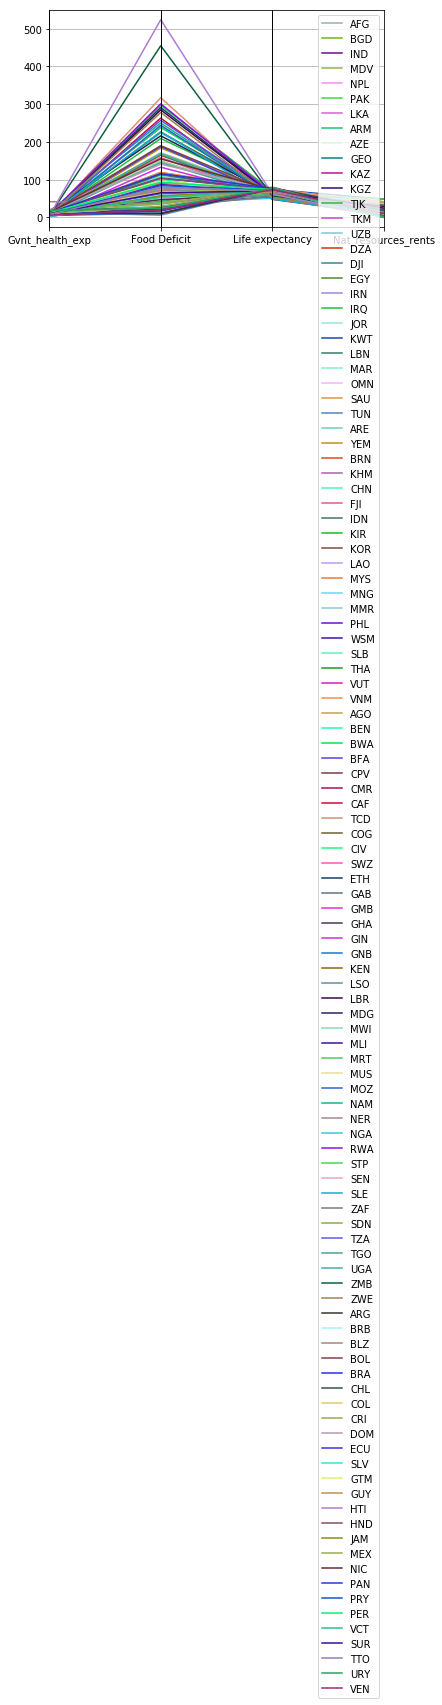

In [11]:
# Represent the data using the parallel coordinates method
from pandas.plotting import parallel_coordinates
parallel_coordinates(dfautres.iloc[:, 3:],'Country Code')
plt.show()

# Merge datasets

In [12]:
data = pd.merge(dfgni, dfautres, how='inner', on=['Country Name', 'Country Code'])

In [13]:
data=data.drop(columns=['Time_x', 'Time Code_x', 'Time_y', 'Time Code_y' ])

In [14]:
# set index with country code
data = data.set_index('Country Code')

In [15]:
data.head()

,Country Name,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,,
AFG,Afghanistan,652860.0,28803167,1.599880e+10,2.255471,158.0,61.226,0.732845
BGD,Bangladesh,148460.0,152149102,1.246171e+11,4.071213,119.0,70.198,1.309144
IND,India,3287260.0,1230980691,1.638663e+12,3.169405,115.0,66.625,4.671042
MDV,Maldives,300.0,364511,2.276923e+09,13.603584,79.0,76.112,0.008966
NPL,Nepal,147180.0,27023137,1.612497e+10,4.802811,74.0,67.914,1.470750


In [16]:
len(data)

111

# Boxplots

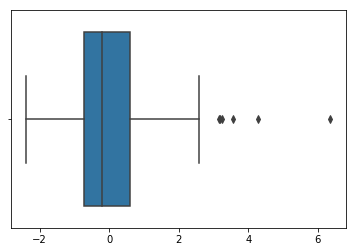

In [17]:
# set index with country code
dfautresn = dfautres
dfautresn = dfautresn.set_index('Country Code')
# boxplot with the dfautre dataset
dfautresn = dfautresn.iloc[:,3:]
Z_scored_dfautres = (dfautresn-dfautresn.mean())/dfautresn.std()
sns.boxplot(Z_scored_dfautres)

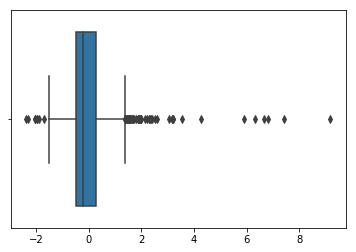

In [18]:
# boxplot with the whole dataset
datan = data.iloc[:,1:]
Z_scored_df = (datan-datan.mean())/datan.std()
sns.boxplot(Z_scored_df)

# Outliers detection

## dfautres

In [19]:
dfautresn.mean(axis=0) # moyenne des lignes pour chaque colonne

Gvnt_health_exp          8.378800
Food Deficit           112.348214
Life expectancy         66.760248
Nat_resources_rents     10.867296
dtype: float64

In [20]:
threshold = 2.5
mask = np.abs(dfautresn) > dfautresn.mean()+threshold*dfautresn.std()
outliers = dfautresn[mask.any(axis=1)]

In [21]:
mask.head()

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,
AFG,False,False,False,False
BGD,False,False,False,False
IND,False,False,False,False
MDV,False,False,False,False
NPL,False,False,False,False


In [22]:
mask.any()

Gvnt_health_exp         True
Food Deficit            True
Life expectancy        False
Nat_resources_rents     True
dtype: bool

In [23]:
data.loc[sorted(list(set(outliers.index)))]

,Country Name,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,,
BLZ,Belize,22970.0,321608,1.239593e+09,41.644164,36.0,69.676,4.992062
COG,"Congo, Rep.",342000.0,4386693,9.024207e+09,4.226890,226.0,60.473,49.144419
HTI,Haiti,27750.0,9999617,6.644822e+09,2.545283,524.0,61.296,1.192176
IRQ,Iraq,435240.0,30762701,1.401081e+11,4.814162,209.0,68.465,41.477584
KWT,Kuwait,17820.0,2998083,1.238811e+11,5.216216,11.0,73.979,48.295617
MRT,Mauritania,1030700.0,3609543,4.274665e+09,4.222889,54.0,61.997,48.699262
SAU,Saudi Arabia,2149690.0,27425676,5.352515e+11,6.669300,18.0,73.574,40.934170
ZMB,Zambia,752610.0,13850033,1.890254e+10,3.313305,455.0,56.588,21.387444


In [24]:
mask.loc[sorted(list(set(outliers.index)))]

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,
BLZ,True,False,False,False
COG,False,False,False,True
HTI,False,True,False,False
IRQ,False,False,False,True
KWT,False,False,False,True
MRT,False,False,False,True
SAU,False,False,False,True
ZMB,False,True,False,False


In [25]:
# we keep outliers not related to nat. ressources
maskbis=mask.iloc[:,:3]
outliersbis = dfautresn[maskbis.any(axis=1)]
outliersbis

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,
ZMB,3.313305,455.0,56.588,21.387444
BLZ,41.644164,36.0,69.676,4.992062
HTI,2.545283,524.0,61.296,1.192176


In [26]:
dfautrestri = dfautresn.loc[sorted(list(set(dfautresn.index).difference(set(outliersbis.index))))]
dfautrestri.head()

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,
AFG,2.255471,158.0,61.226,0.732845
AGO,4.261282,149.0,58.192,39.037754
ARE,8.526791,35.0,76.344,20.580810
ARG,11.692604,10.0,75.595,3.137998
ARM,6.443148,43.0,73.331,2.992090


In [27]:
len(dfautrestri)

109

## data

In [28]:
datan.mean(axis=0) # moyenne des lignes pour chaque colonne

Surface                6.831314e+05
Population             4.859118e+07
GNI                    1.777908e+11
Gvnt_health_exp        8.391488e+00
Food Deficit           1.116667e+02
Life expectancy        6.681770e+01
Nat_resources_rents    1.095765e+01
dtype: float64

In [29]:
threshold = 2.5
mask2 = np.abs(datan) > datan.mean()+threshold*datan.std()
outliers2 = datan[mask2.any(axis=1)]

In [30]:
mask2.head()

,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,
AFG,False,False,False,False,False,False,False
BGD,False,False,False,False,False,False,False
IND,False,True,False,False,False,False,False
MDV,False,False,False,False,False,False,False
NPL,False,False,False,False,False,False,False


In [31]:
mask2.any()

Surface                 True
Population              True
GNI                     True
Gvnt_health_exp         True
Food Deficit            True
Life expectancy        False
Nat_resources_rents     True
dtype: bool

In [32]:
mask2.loc[sorted(list(set(outliers2.index)))]

,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,
BLZ,False,False,False,True,False,False,False
BRA,True,False,True,False,False,False,False
CHN,True,True,True,False,False,False,False
COG,False,False,False,False,False,False,True
HTI,False,False,False,False,True,False,False
IND,False,True,False,False,False,False,False
IRQ,False,False,False,False,False,False,True
KWT,False,False,False,False,False,False,True
MRT,False,False,False,False,False,False,True


In [33]:
data.loc[sorted(list(set(outliers2.index)))]

,Country Name,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,,
BLZ,Belize,22970.0,321608,1.239593e+09,41.644164,36.0,69.676,4.992062
BRA,Brazil,8515770.0,196796269,2.144024e+12,8.392290,17.0,73.838,4.452136
CHN,China,9562911.0,1337705000,6.074549e+12,9.447319,108.0,75.236,6.249178
COG,"Congo, Rep.",342000.0,4386693,9.024207e+09,4.226890,226.0,60.473,49.144419
HTI,Haiti,27750.0,9999617,6.644822e+09,2.545283,524.0,61.296,1.192176
IND,India,3287260.0,1230980691,1.638663e+12,3.169405,115.0,66.625,4.671042
IRQ,Iraq,435240.0,30762701,1.401081e+11,4.814162,209.0,68.465,41.477584
KWT,Kuwait,17820.0,2998083,1.238811e+11,5.216216,11.0,73.979,48.295617
MRT,Mauritania,1030700.0,3609543,4.274665e+09,4.222889,54.0,61.997,48.699262


In [34]:
# we keep outliers not related to nat. ressources
mask2bis=mask2.iloc[:,:6]
outliers2bis = datan[mask2bis.any(axis=1)]
outliers2bis

,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,
IND,3287260.0,1230980691,1.638663e+12,3.169405,115.0,66.625,4.671042
CHN,9562911.0,1337705000,6.074549e+12,9.447319,108.0,75.236,6.249178
ZMB,752610.0,13850033,1.890254e+10,3.313305,455.0,56.588,21.387444
BLZ,22970.0,321608,1.239593e+09,41.644164,36.0,69.676,4.992062
BRA,8515770.0,196796269,2.144024e+12,8.392290,17.0,73.838,4.452136
HTI,27750.0,9999617,6.644822e+09,2.545283,524.0,61.296,1.192176


We decided to remove both Haïti and Zambia, because they appear as outliers for our Food Deficit indicator, which is already given in kilocalories per person per day. As for the others outliers, we decided to calculate Density instead of keeping Surface and Population, and divided GNI by the population, so that it is expressed as a ratio of the total population.

In [35]:
datanbis=datan.copy(deep=True)
Density=datanbis.iloc[:,1]/datanbis.iloc[:,0]
datanbis.iloc[:,2]=datanbis.iloc[:,2]/datanbis.iloc[:,1]
datanbis=datanbis.drop(columns="Population")

In [36]:
datanbis.iloc[:,0]=Density
datanbis=datanbis.rename({"Surface":"Density"}, axis='columns')
len(datanbis)

111

In [37]:
datanbis.head()

,Density,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,
AFG,44.118443,555.452845,2.255471,158.0,61.226,0.732845
BGD,1024.849131,819.045892,4.071213,119.0,70.198,1.309144
IND,374.470133,1331.185348,3.169405,115.0,66.625,4.671042
MDV,1215.036667,6246.514208,13.603584,79.0,76.112,0.008966
NPL,183.606040,596.709892,4.802811,74.0,67.914,1.470750


In [38]:
threshold = 2.5
mask3 = np.abs(datanbis) > datanbis.mean()+threshold*datanbis.std()
outliers3 = datanbis[mask3.any(axis=1)]
# we keep outliers not related to nat. ressources
mask3=mask3.iloc[:,:5]
outliers3 = datanbis[mask3.any(axis=1)]
outliers3.loc[sorted(list(set(outliers3.index)))]

,Density,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,
ARE,98.931627,35037.098572,8.526791,35.0,76.344000,20.580810
BGD,1024.849131,819.045892,4.071213,119.0,70.198000,1.309144
BLZ,14.001219,3854.358722,41.644164,36.0,69.676000,4.992062
BRB,650.160465,15602.767117,9.003511,32.0,74.973000,0.357216
BRN,67.359099,35009.581649,5.776835,18.0,76.719000,19.628028
HTI,360.346559,664.507604,2.545283,524.0,61.296000,1.192176
KWT,168.242593,41320.087183,5.216216,11.0,73.979000,48.295617
MDV,1215.036667,6246.514208,13.603584,79.0,76.112000,0.008966
MUS,612.941176,8095.978692,8.087430,37.0,72.967317,0.006834


In [39]:
mask3.loc[sorted(list(set(outliers3.index)))]

,Density,GNI,Gvnt_health_exp,Food Deficit,Life expectancy
Country Code,,,,,
ARE,False,True,False,False,False
BGD,True,False,False,False,False
BLZ,False,False,True,False,False
BRB,True,False,False,False,False
BRN,False,True,False,False,False
HTI,False,False,False,True,False
KWT,False,True,False,False,False
MDV,True,False,False,False,False
MUS,True,False,False,False,False


As there are even more outliers with transformed data, we keep the former dataframe and remove the outliers previously identified

In [40]:
outliers2bis

,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,
IND,3287260.0,1230980691,1.638663e+12,3.169405,115.0,66.625,4.671042
CHN,9562911.0,1337705000,6.074549e+12,9.447319,108.0,75.236,6.249178
ZMB,752610.0,13850033,1.890254e+10,3.313305,455.0,56.588,21.387444
BLZ,22970.0,321608,1.239593e+09,41.644164,36.0,69.676,4.992062
BRA,8515770.0,196796269,2.144024e+12,8.392290,17.0,73.838,4.452136
HTI,27750.0,9999617,6.644822e+09,2.545283,524.0,61.296,1.192176


In [41]:
datatri = datan.loc[sorted(list(set(datan.index).difference(set(outliers2bis.index))))]
datatri.head()

,Surface,Population,GNI,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,,,,
AFG,652860.0,28803167,1.599880e+10,2.255471,158.0,61.226,0.732845
AGO,1246700.0,23369131,7.443928e+10,4.261282,149.0,58.192,39.037754
ARE,83600.0,8270684,2.897808e+11,8.526791,35.0,76.344,20.580810
ARG,2780400.0,41223889,4.091479e+11,11.692604,10.0,75.595,3.137998
ARM,29740.0,2877311,9.718566e+09,6.443148,43.0,73.331,2.992090


In [42]:
len(datatri)

105

# Correlation

## dfautrestri

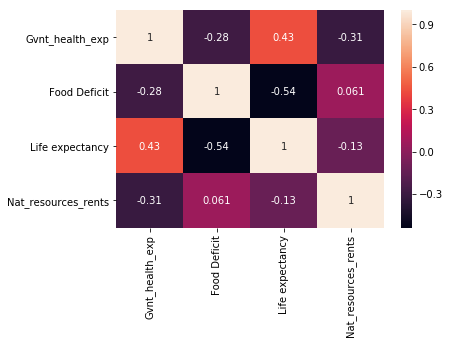

In [43]:
sns.heatmap(dfautrestri.corr(),annot=True)

## datatri

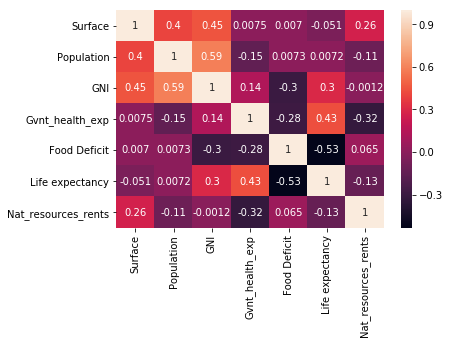

In [44]:
sns.heatmap(datatri.corr(),annot=True)

# Normalize data 

## dfautrestri

In [45]:
Z_dfautrestri = (dfautrestri - dfautrestri.mean())/dfautrestri.std()
dfautrestri.head()

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents
Country Code,,,,
AFG,2.255471,158.0,61.226,0.732845
AGO,4.261282,149.0,58.192,39.037754
ARE,8.526791,35.0,76.344,20.580810
ARG,11.692604,10.0,75.595,3.137998
ARM,6.443148,43.0,73.331,2.992090


In [46]:
# Represent the data using the parallel coordinates method
#from pandas.plotting import parallel_coordinates
#parallel_coordinates(dfautresn,dfautresn.index, alpha=0.2)
#plt.show()

## datatri

In [47]:
Z_datatri = (datatri - datatri.mean())/datatri.std()

# Clustering (dfautrestri)

## Hierarchical clustering

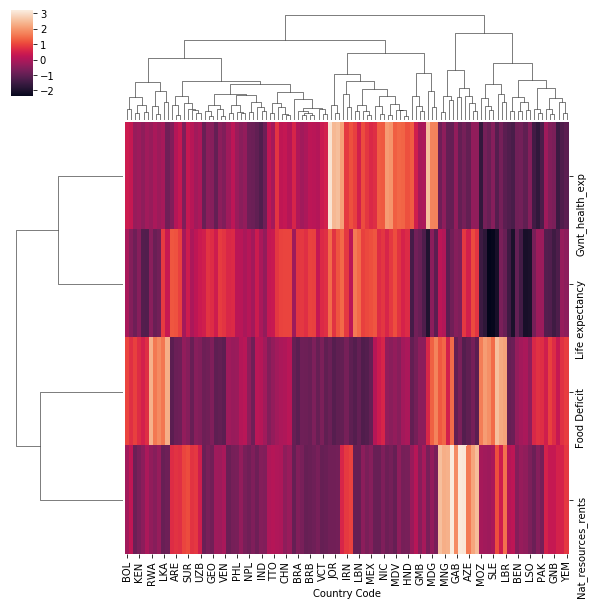

In [48]:
sns.clustermap(Z_dfautrestri.T,method='complete')

### agglomerative clustering

In [49]:
agc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
agc.fit(Z_dfautrestri)
        
dffdv = Z_dfautrestri.values # get the data matrix of values (dataframe feature data values)
clusters = agc.labels_ #cluster labels for each point

In [50]:
Z_dfautrestri2=Z_dfautrestri.copy()

In [51]:
Z_dfautrestri2=Z_dfautrestri2.assign(cluster=clusters)

In [52]:
Z_dfautrestri2.head()

,Gvnt_health_exp,Food Deficit,Life expectancy,Nat_resources_rents,cluster
Country Code,,,,,
AFG,-1.423516,0.630369,-0.701610,-0.854344,0
AGO,-0.941049,0.520997,-1.078304,2.360159,1
ARE,0.084953,-0.864389,1.175408,0.811274,0
ARG,0.846441,-1.168201,1.082413,-0.652506,0
ARM,-0.416235,-0.767169,0.801320,-0.664751,0


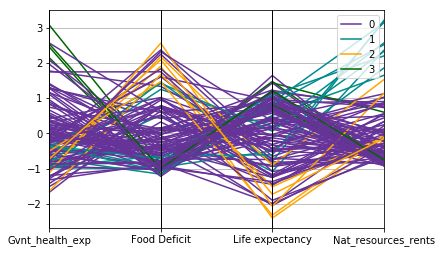

In [75]:
# Represent the clustered data using the parallel coordinates method
from pandas.plotting import parallel_coordinates
parallel_coordinates(Z_dfautrestri2,'cluster', color=('rebeccapurple', 'darkcyan', 'orange', 'darkgreen'))
plt.show()

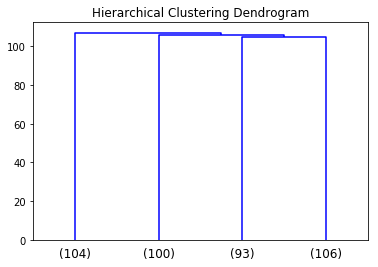

In [53]:
plt.title('Hierarchical Clustering Dendrogram')
plot_sklearn_dendrogram(agc, labels=agc.labels_, truncate_mode='lastp', p=4) #cf plot_sklearn_dendrogram.py
plt.show()

In [54]:
# silhouette score
metrics.silhouette_score(dffdv, clusters, metric='euclidean', sample_size=None) # sample_size=None for no sampling 

0.17086809792513927

In [55]:
# to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(Z_dfautrestri, clusters)

/home/hana/Documents/Softs/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# number of classes
rf.n_classes_

4

In [57]:
# feature importance
rf.feature_importances_

array([0.184995  , 0.13376336, 0.17390151, 0.50734014])

We can see that "Natural Ressources rents" is the most important feature

## Kmeans

In [98]:
## test du nombre de cluster:
SSE = [] #stockage des SSE pour chaque nombre de cluster
silh = [] #stockage des coeff silhouettes pour chaque nombre de cluster
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans = kmeans.fit(Z_dfautrestri)
    Z_dfautrestri["cluster"] = kmeans.predict(Z_dfautrestri)
    SSE.append(kmeans.inertia_)
    silh.append(metrics.silhouette_score(Z_dfautrestri, Z_dfautrestri["cluster"], metric='euclidean', sample_size=None))

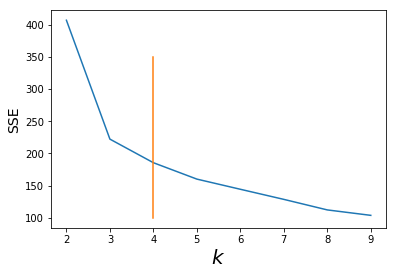

In [99]:
## graphe de la SSE:
plt.plot(range(2,10),SSE)
plt.plot([4,4],[100,350])
plt.xlabel("$k$",fontsize=20)
plt.ylabel("SSE",fontsize=14)

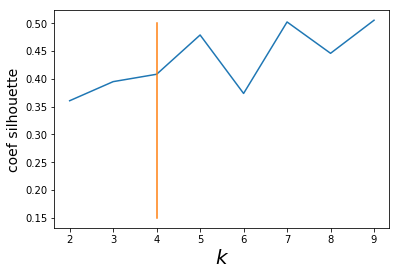

In [100]:
## coeff silhouette:
plt.plot(range(2,10),silh)
plt.plot([4,4],[0.15,0.5])
plt.xlabel("$k$",fontsize=20)
plt.ylabel("coef silhouette",fontsize=14)

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans = kmeans.fit(Z_dfautrestri)
Z_dfautrestri["cluster"] = kmeans.predict(Z_dfautrestri)

In [102]:
metrics.silhouette_score(Z_dfautrestri, Z_dfautrestri["cluster"], metric='euclidean', sample_size=None)

0.3002977298615802

In [103]:
sse = kmeans.inertia_
print "sse =", sse

sse = 307.19415565952875


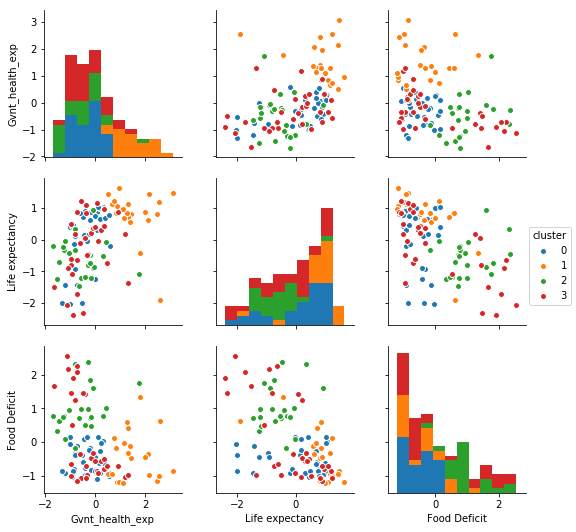

In [104]:
sns.pairplot(Z_dfautrestri,vars=["Gvnt_health_exp","Life expectancy","Food Deficit"],hue="cluster")

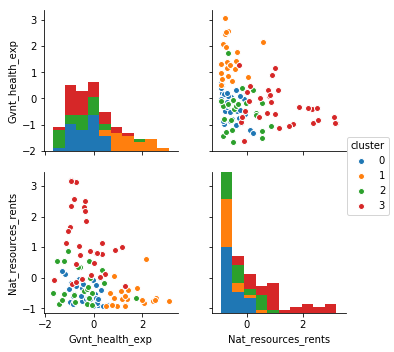

In [105]:
sns.pairplot(Z_dfautrestri,vars=["Gvnt_health_exp","Nat_resources_rents"],hue="cluster")

### Stability

In [107]:
silhouette_coef = []
sse = []
k = 4
n_init=1
for i in range(100):
    km = KMeans(n_clusters=k, n_init=n_init, random_state=i) # create a KMeans object
    km.fit(Z_dfautrestri)
    labels = km.predict(Z_dfautrestri)
    sse.append(km.inertia_)
    silhouette_coef.append(metrics.silhouette_score(Z_dfautrestri, labels, metric='euclidean', sample_size=None))

(array([67.,  6.,  1.,  0.,  1., 19.,  4.,  0.,  0.,  2.]),
 array([210.3209371 , 216.56565136, 222.81036561, 229.05507986,
        235.29979412, 241.54450837, 247.78922262, 254.03393688,
        260.27865113, 266.52336539, 272.76807964]),
 <a list of 10 Patch objects>)

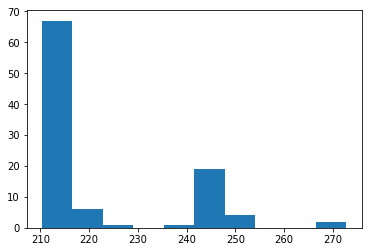

In [108]:
plt.hist(sse)

(array([ 3.,  1.,  0.,  2., 10.,  0.,  3.,  3.,  1., 77.]),
 array([0.30253688, 0.30940204, 0.31626721, 0.32313238, 0.32999755,
        0.33686271, 0.34372788, 0.35059305, 0.35745821, 0.36432338,
        0.37118855]),
 <a list of 10 Patch objects>)

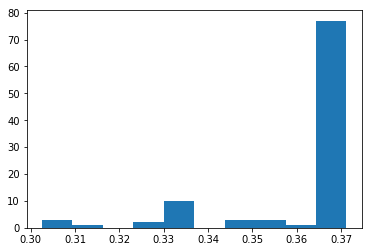

In [109]:
plt.hist(silhouette_coef)

In [113]:
def compute_stability(k,df,iterations=100):
    silhouette_coef = []
    for i in range(iterations):
        km = KMeans(n_clusters=k, n_init=1, random_state=i) # create a KMeans object
        km.fit(df)
        labels = km.predict(df)
        silhouette_coef.append(metrics.silhouette_score(df, labels, metric='euclidean', sample_size=None))
    silhouette_coef = np.asarray(silhouette_coef)
    return(silhouette_coef.std())

In [114]:
stability = []
Ks = range(2,30)
for k in Ks:
    stability.append(compute_stability(k,Z_dfautrestri))

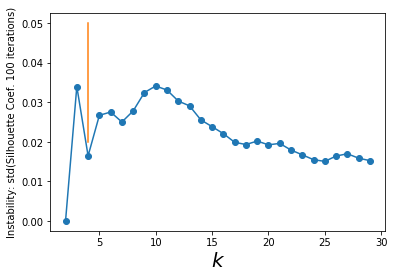

In [115]:
plt.plot(Ks,stability,"o-")
plt.plot([4,4],[0.02,0.050])
plt.xlabel("$k$",fontsize=20)
plt.ylabel("Instability: std(Silhouette Coef. 100 iterations)")

###### ==> we'll keep 4 clusters

## DBSCAN